# Table of contents 
1. [Overview](#Overview)

    a. [Business problem](#Business-problem)

    b. [Data sources](#Data-sources)
    
    c. [Quantifying the three metrics](#Quantifying-the-three-metrics)

2. [Methods](#Methods)

    a. [Data import and cleaning](#Data-import-and-cleaning)
    
    b. [Feature engineering](#Feature-engineering)

    c. [Data preparation for analysis](#Data-preparation-for-analysis)

3. [Analysis](#Analysis)

    a. [Frequency](#Frequency)
    
    b. [Engagement](#Engagement)
    
    c. [Profit](#Profit)


4. [Conclusions](#Conclusions)

    a. [Next steps](#Next-steps)

___

# Overview

The aim of this analysis is to provide insight on opportunities for the movie studio (Microsoft) to pursue, in the context of basic film genres. Exploratory data analysis (EDA) were conducted on production frequency, viewer engagement, and profit by genre. Taking into account both engagement and profit, it is recommended for Microsoft to start by focusing on producing low budget films within the genres os sci-fi, thriller and mystery, and marketing these films domestically. Suggestions on further metrics to explore beyond film genres are presented; these suggested aspects should be considered when designing and implementing an optimal business strategy.

___

## Business problem

__[Researchers of Film Studies at Yale University](https://guides.library.yale.edu/c.php?g=295800&p=1975072)__ have identified that at least 40 genres exist within the medium of cinema. With such a large number, it's easy to be overwhelmed when trying to figure out the types of movies that seem to be performing the best. 

A quick online search of the 'Top 10 Best Movie Genres' seem to yield the usual suspects: **Action, Comedy, Drama, Sci-fi, Romance, Fantasy, Horror, Mystery, Animation** and **Thriller**. But which genres are the best of the best? This analysis attempts to tackle this question through three metrics:

1. **Frequency**: Which genres tend to be produced the most? 
2. **Engagement**: Which genres tend to have the highest viewership, and are rated the most favourably?
3. **Profit**: Which genres tend to bring in the highest return on investment (ROI)?

___

## Data sources 

* **Internet Movie Database (IMDb)**: information on film titles, release dates, and genres
* **The Movie Database (TMDB)**: information on film titles, release dates, and genres 
* **Box Office Mojo (BOM)**: information on domestic and foreign box-office revenue
* **The Numbers (TN)**: information on production budgets, and domestic and worldwide box-office revenue

___

## Quantifying the three metrics 

> Note: Analyses will be limited to the 26 __[basic genres](https://www.premiumbeat.com/blog/guide-to-basic-film-genres/#the-basic-film-genres)__  available via the data sources.

1. **Frequency**: Which genres tend to be produced the most? 

* The total number of movies produced by genre will be calculated for each year between the years 2014 - 2018
* The average number of movies produced per genre across the five year period will be calculated 
* A trend analysis will be conducted for the Top 6 genres produced.

2. **Engagement**: Which genres tend to have the highest viewership, and are rated the most favourably?

* Viewership will be estimated by the number of votes logged for each movie. The average number of viewers by genre will be calculated
* As movies will have a large range in terms of viewership even within genres, a weighted grand average rating will be calculated for each genre

3. **Profit**: Which genres tend to bring in the highest return on investment (ROI)?

* ROI is defined as `total revenue/production budget` 
* The median ROI will be calculated within both a domestic and a foreign scope
* Findings will be stratified by production budget category. Categories will be defined as per
__[this article](https://www.studiobinder.com/blog/production-budget/#:~:text=Blockbuster%20Movie%20Budgets&text=High%2Dbudget%20movies%20are%20almost,of%20more%20than%20%2450%20million.)__. Low: <%\\$5 million | Medium: \\$5 - \\$50 million | High: >\\$50 million 

> Note: Each movie record is associated with a maximum of three genres. For the purposes of the following analyses, each movie will count towards all genres that movie is categorised as. <br> *(e.g., 'Girls Trip' genres: Comedy, Drama; 'Girls Trip' will separately count as a Comedy movie and a Drama movie)*

___

# Methods

## Data import and cleaning

### importing the datasets

In [ ]:
import pandas as pd, numpy as np

In [ ]:
# setting up file paths
filepath = r'.'
import_path = filepath + r'\zippedData'
export_path = filepath + r'\exportedData'

In [3]:
# IMDB and TMDB: release dates, genres, viewer votes and ratings
imdb_basics = pd.read_csv(import_path + r'\imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv(import_path + r'\imdb.title.ratings.csv.gz')
tmdb_movies = pd.read_csv(import_path + r'\tmdb.movies.csv.gz')

# BOM and TN: production budgets, domestic, foreign and worldwide gross
bom_gross = pd.read_csv(import_path + r'\bom.movie_gross.csv.gz')
tn_budgets = pd.read_csv(import_path + r'\tn.movie_budgets.csv.gz')

In [4]:
# returning info on the imported datasets
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### there seems to be significantly fewer movie records in the TMDB vs. the IMDB dataset. it's also worth noting that `release_date` in the TMDB dataset is stored as a **string**.

In [7]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### some values on domestic and foreign gross is missing from `bom_gross`, whereas `tn_values` have no missing values. its also worth noting that `release_date` in the TN dataset is stored as a **string**.

___

### merging `imdb_basics` and `imdb_ratings` into a single dataframe, `imdb_movies`

In [9]:
# primary key: tconst
imdb_movies = imdb_basics.merge(imdb_ratings, how='inner', on='tconst').copy()

In [10]:
# checking for duplicate entries
imdb_movies.duplicated(['original_title', 'start_year'], keep=False).value_counts()

False    73085
True       771
dtype: int64

In [11]:
duplicates_df = imdb_movies[imdb_movies.duplicated(['original_title', 'start_year'], keep=False)].sort_values(['original_title', 'numvotes'], ascending=False).copy()
print(duplicates_df.shape)

(771, 8)


In [12]:
duplicates_df.head(6)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56862,tt5815346,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",7.2,85
62945,tt6667868,Zoom,Zoom,2016,NaN,Horror,5.4,17
49080,tt4842680,Zeus,Zeus,2016,115.0,"Biography,Drama,History",6.5,44
58771,tt6066078,Zeus,Zeus,2016,105.0,Drama,7.3,30
23668,tt2380333,Worm,Worm,2013,93.0,"Horror,Romance,Sci-Fi",6.2,85
26236,tt2543930,Worm,Worm,2013,NaN,Drama,7.4,73


#### oddly enough, a number of movies have duplicate records despite having unique `tconst` values. for every duplicate, the record with a higher `numvotes` value will be retained.

In [13]:
dups_to_drop = imdb_movies[imdb_movies.duplicated(['original_title', 'start_year'], keep='first')].sort_values(['original_title', 'numvotes'], ascending=False).copy()
dups_to_drop.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
62945,tt6667868,Zoom,Zoom,2016,NaN,Horror,5.4,17
58771,tt6066078,Zeus,Zeus,2016,105.0,Drama,7.3,30
26236,tt2543930,Worm,Worm,2013,NaN,Drama,7.4,73


In [14]:
# creating a list of tconst values for movies to be dropped
duplicates_to_drop_list = dups_to_drop['tconst'].tolist()
print(duplicates_to_drop_list[:3])

['tt6667868', 'tt6066078', 'tt2543930']


In [15]:
# testing the filter
duplicates_df = duplicates_df[ ~(duplicates_df['tconst'].isin(duplicates_to_drop_list)) ]
duplicates_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56862,tt5815346,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",7.2,85
49080,tt4842680,Zeus,Zeus,2016,115.0,"Biography,Drama,History",6.5,44
23668,tt2380333,Worm,Worm,2013,93.0,"Horror,Romance,Sci-Fi",6.2,85


In [16]:
# applying the filter to the actual IMDB dataset
imdb_movies = imdb_movies[ ~(imdb_movies['tconst'].isin(duplicates_to_drop_list)) ]

In [17]:
# confirming there aren't any more duplicate entries
imdb_movies.duplicated(['original_title', 'start_year'], keep=False).value_counts()

False    73460
dtype: int64

In [18]:
# retain only the required columns
imdb_movies = imdb_movies[['tconst', 'original_title', 'start_year', 'genres', 'averagerating', 'numvotes']].copy()

___

### creating a `year` column in `tmdb_movies` and `tn_budgets` 

In [19]:
tmdb_movies['year'] = tmdb_movies['release_date'].str[:4].astype('int64')

# confirming new data type
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  year               26517 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.2+ MB


In [20]:
tn_budgets['year'] = tn_budgets['release_date'].str[-4:].astype('int64')

# confirming new data type
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   year               5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


___

### comparing the IMDB and TMDB datasets

#### it may be worth dropping `tmdb_movies`, just through comparing the number of records in this dataset with `imdb_movies`

#### however, it's still important to assess whether there would be any valuable information from the TMDB dataset, which may be absent from the IMDB dataset.

In [21]:
imdb_movies.head(3)

,tconst,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9,4517


In [22]:
tmdb_movies.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010


In [23]:
# sampling 100 movies from the IMDB dataset
# movies sampled sit at >=75th percentile of the number of votes (numvotes)
# (to ensure obscure movies won't affect the dataset comparison)

imdb_sample = imdb_movies[imdb_movies.numvotes >= imdb_movies.numvotes.quantile(.75)].copy()
imdb_sample = imdb_sample.sample(n=150, random_state=15).copy()

In [24]:
imdb_sample.tail()

,tconst,original_title,start_year,genres,averagerating,numvotes
32719,tt3152602,Il giovane favoloso,2014,"Biography,Drama,History",6.8,2205
1158,tt1160996,The Colony,2013,"Action,Horror,Sci-Fi",5.3,40761
47094,tt4587656,The Star,2017,"Adventure,Animation,Comedy",6.1,5159
23685,tt2381111,Brooklyn,2015,"Drama,Romance",7.5,117021
37608,tt3576842,"Elvira, te daría mi vida pero la estoy usando",2014,"Comedy,Drama",6.5,1176


In [25]:
# out of all the movies in the TMDB dataset, how many have a matching record with the IMDB sample dataset?
imdb_tmdb_compare = tmdb_movies.merge(imdb_sample, how='inner', left_on=['original_title', 'year'], right_on=['original_title', 'start_year']).copy()

print("Out of the {} movies in the TMDB dataset, {} have a matching record with the 150 movies sampled from the IMDB dataset".format(tmdb_movies.shape[0], imdb_tmdb_compare.shape[0]))

Out of the 26517 movies in the TMDB dataset, 49 have a matching record with the 150 movies sampled from the IMDB dataset


In [26]:
# comparing the viewer average rating and viewer vote count values between the IMDB and TMDB datasets
imdb_tmdb_compare = imdb_tmdb_compare[['original_title', 'vote_average', 'vote_count', 'averagerating', 'numvotes']].copy()

# renaming columns for easier distinction between data sources
imdb_tmdb_compare.columns = ['title', 'tmdb_avg_rating', 'tmdb_vote_count', 'imdb_avg_rating', 'imdb_vote_count']

imdb_tmdb_compare.head()

,title,tmdb_avg_rating,tmdb_vote_count,imdb_avg_rating,imdb_vote_count
0,Eat Pray Love,6.0,1208,5.8,77709
1,Skyline,4.8,833,4.4,83710
2,Womb,6.1,159,6.4,12489
3,The Penthouse,3.5,10,3.7,1345
4,The Last Play at Shea,4.7,3,7.9,288


#### IMDB not only has more movie records, but more movie viewers also tend to engage with their website relative to TMDB (as quantified by the  number of votes). 

#### this justifies the use of `imdb_movies`, whereas `tmdb_movies` can be dropped from analyses.

___

### checking the range of years for movie records in each dataset

In [27]:
imdb_years = sorted(list(imdb_movies['start_year'].unique()))
bom_years = sorted(list(bom_gross['year'].unique()))
tn_years = sorted(list(tn_budgets['year'].unique()))

for yr in [imdb_years, bom_years, tn_years]:
    print(yr[::len(yr)-1])

[2010, 2019]
[2010, 2018]
[1915, 2020]


#### records outside the range **2010 - 2018** will be dropped.

In [28]:
# filtering data to desired year range: IMDB
imdb_movies = imdb_movies[imdb_movies['start_year']!=2019].copy()

sorted(list(imdb_movies['start_year'].unique()))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [29]:
# filtering data to desired year range: TN
tn_budgets = tn_budgets[tn_budgets['year'].isin(range(2010,2019))].copy()

sorted(list(tn_budgets['year'].unique()))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

___

### merging `tn_budgets` and `bom_gross` into a single dataframe: `budgets_profits`

In [30]:
tn_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [31]:
bom_gross.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


> movies that have been remade in later years have the year in parantheses (e.g., Alice in Wonderland (2010)) in `bom_gross`, but this isn't the case in `tn_budgets`

the two datasets need to be merged on two columns: movie title and year. the `title` column needs to be reformatted to ensure the data is merged correctly. 

In [32]:
# test on two movie titles: Alice in Wonderland and Leap Year

# establishing the test datasets
test_tn = tn_budgets[(tn_budgets['movie'].str.contains('Alice in Wonderland')) | (tn_budgets['movie'].str.contains('Leap Year'))]
test_bom = bom_gross[(bom_gross['title'].str.contains('Alice in Wonderland')) | (bom_gross['title'].str.contains('Leap Year'))]

In [33]:
test_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
50,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110",2010
2739,40,"Jan 8, 2010",Leap Year,"$19,000,000","$25,918,920","$32,618,920",2010


In [34]:
test_bom

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
129,Leap Year,Uni.,25900000.0,6700000,2010
660,Leap Year (2011),Strand,13000.0,175000,2011


In [35]:
# using regex to remove the years from movie titles in the BOM dataset
# ignore Jupyter FutureWarning
test_bom['title'] = test_bom['title'].str.replace(r'(\d)', '').str.replace(' ()', '', regex=False)

C:\Users\nmuh0566\AppData\Local\Temp\ipykernel_30412\2590734291.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_bom['title'] = test_bom['title'].str.replace(r'(\d)', '').str.replace(' ()', '', regex=False)
C:\Users\nmuh0566\AppData\Local\Temp\ipykernel_30412\2590734291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_bom['title'] = test_bom['title'].str.replace(r'(\d)', '').str.replace(' ()', '', regex=False)


In [36]:
test_bom

,title,studio,domestic_gross,foreign_gross,year
1,Alice in Wonderland,BV,334200000.0,691300000,2010
129,Leap Year,Uni.,25900000.0,6700000,2010
660,Leap Year,Strand,13000.0,175000,2011


> merging `test_tn` and `test_bom` will yield two rows, for Alice in Wonderland and Leap Year 2010

In [37]:
# merging the test datasets
test_bom.merge(test_tn, how='inner', left_on=['title', 'year'], right_on=['movie', 'year'], suffixes=('_bom', '_tn'))

,title,studio,domestic_gross_bom,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
0,Alice in Wonderland,BV,334200000.0,691300000,2010,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
1,Leap Year,Uni.,25900000.0,6700000,2010,40,"Jan 8, 2010",Leap Year,"$19,000,000","$25,918,920","$32,618,920"


In [38]:
# repeating the above steps to merge the actual datasets 
bom_gross['title'] = bom_gross['title'].str.replace(r'(\d)', '').str.replace(' ()', '', regex=False)
budgets_profits = bom_gross.merge(tn_budgets, how='inner', left_on=['title', 'year'], right_on=['movie', 'year'], suffixes=('_bom', '_tn'))

budgets_profits.head(3)

C:\Users\nmuh0566\AppData\Local\Temp\ipykernel_30412\1529570967.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  bom_gross['title'] = bom_gross['title'].str.replace(r'(\d)', '').str.replace(' ()', '', regex=False)


,title,studio,domestic_gross_bom,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_tn,worldwide_gross
0,Alice in Wonderland,BV,334200000.0,691300000,2010,51,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"


In [39]:
budgets_profits.duplicated(['title', 'year'], keep=False).value_counts()

False    1227
dtype: int64

In [40]:
# retain only the required columns 
budgets_profits = budgets_profits[['title', 'year', 'production_budget', 'domestic_gross_tn', 'worldwide_gross']].copy()
budgets_profits.head(3)

,title,year,production_budget,domestic_gross_tn,worldwide_gross
0,Alice in Wonderland,2010,"$200,000,000","$334,191,110","$1,025,491,110"
1,Inception,2010,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,2010,"$165,000,000","$238,736,787","$756,244,673"


___

## Feature engineering

### creating `foreign_gross` in `budgets_profits` using the columns: `domestic_gross` and `worldwide_gross`

#### reminder that the BOM dataset columns have missing values, while the TN dataset columns do not.

In [41]:
# renaming 'domestic_gross_tn' to 'domestic_gross'
budgets_profits.rename(columns={'domestic_gross_tn':'domestic_gross'}, inplace=True)

# inserting 'foreign_gross' between domestic and worldwide columns
budgets_profits.insert(4, 'foreign_gross', np.nan)

#### the budget and gross earnings columns need to be reformatted by removing the dollar symbol and the comma, then converting them to int datatypes.

In [42]:
# clean money columns: remove $ and , symbols, convert to int dtype
# ignore FutureWarning
for col in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    budgets_profits[col] = budgets_profits[col].str.replace("$", "").str.replace(",", "").astype('int64')

C:\Users\nmuh0566\AppData\Local\Temp\ipykernel_30412\1552574078.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budgets_profits[col] = budgets_profits[col].str.replace("$", "").str.replace(",", "").astype('int64')


In [43]:
# filling in the 'foreign_gross' column
budgets_profits['foreign_gross'] = budgets_profits['worldwide_gross'] - budgets_profits['domestic_gross']
budgets_profits.head(3)

,title,year,production_budget,domestic_gross,foreign_gross,worldwide_gross
0,Alice in Wonderland,2010,200000000,334191110,691300000,1025491110
1,Inception,2010,160000000,292576195,542948447,835524642
2,Shrek Forever After,2010,165000000,238736787,517507886,756244673


___

### creating genre Boolean masks for each record


In [44]:
# replace null values with 'Unknown'
# this needs to be done for the subsequent steps to work
imdb_movies['genres'].fillna('Unknown', inplace=True)

In [45]:
# observing how the genre information currently appears in the dataset
genres_raw = list(imdb_movies['genres'].unique())
print(genres_raw[:10])

['Action,Crime,Drama', 'Drama', 'Comedy,Drama', 'Comedy,Drama,Fantasy', 'Horror,Thriller', 'Adventure,Animation,Comedy', 'History', 'Documentary', 'Animation,Drama,History', 'Drama,Mystery']


In [46]:
# creating a list of unique genres
genres = list()

for genre_grp in genres_raw: 
    genre_lst = genre_grp.split(",")
    for g in genre_lst: 
        if g not in genres:
            genres.append(g)
            
print(genres)

['Action', 'Crime', 'Drama', 'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'History', 'Documentary', 'Mystery', 'Unknown', 'Biography', 'Sci-Fi', 'Family', 'Romance', 'War', 'Music', 'Sport', 'Western', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult', 'Short']


In [47]:
len(genres)

27

In [48]:
# reformatting the 'genres' column to a list of strings
imdb_movies['genres'] = imdb_movies['genres'].str.split(",")

imdb_movies.head(3)

,tconst,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13


#### 27 columns will be created: one for each genre (including 'Unknown'). each column will contain a Boolean value.

In [49]:
# test: creating the column 'genre_action'
imdb_movies['genre_action'] = imdb_movies['genres'].apply(lambda x: True if 'Action' in x else False)

imdb_movies.head(3)

,tconst,original_title,start_year,genres,averagerating,numvotes,genre_action
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77,True
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.9,4517,False
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13,False


In [50]:
imdb_movies[imdb_movies['genre_action']==True].head(3)

,tconst,original_title,start_year,genres,averagerating,numvotes,genre_action
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77,True
16,tt0249516,Foodfight!,2012,"[Action, Animation, Comedy]",1.9,8248,True
22,tt0276568,To Chase a Million,2018,"[Action, Drama]",7.4,5,True


In [51]:
# creating the Boolean columns
for g in genres:
    imdb_movies['genre_{}'.format(g.lower())] = imdb_movies['genres'].apply(lambda x: True if g in x else False)
    
imdb_movies.head(3)

,tconst,original_title,start_year,genres,averagerating,numvotes,genre_action,genre_crime,genre_drama,genre_comedy,...,genre_war,genre_music,genre_sport,genre_western,genre_musical,genre_news,genre_reality-tv,genre_game-show,genre_adult,genre_short
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.0,77,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.9,4517,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.1,13,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


#### exporting the IMDB dataset

In [52]:
imdb_movies.to_csv(export_path + r'\masterDatasets\imdb_movies.csv', index=False)

___

## Data preparation for analysis

### 1. Genres produced by year

In [53]:
# group movies by year
genres_by_year = imdb_movies.groupby('start_year')

# return number of movies produced by year
genres_yr = genres_by_year.sum().copy()

# drop unnecessary columns, and the 'genre_unknown' row
genres_yr.drop(columns=['averagerating', 'numvotes', 'genre_unknown'], inplace=True)

# transpose the dataset and reset the index
genres_yr = genres_yr.transpose().reset_index()
genres_yr.rename(columns={'index':'genre'}, inplace=True)

C:\Users\nmuh0566\AppData\Local\Temp\ipykernel_30412\527572745.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genres_yr = genres_by_year.sum().copy()


In [54]:
genres_yr

start_year,genre,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,genre_action,690,688,688,715,771,794,849,852,697
1,genre_crime,423,464,472,505,523,532,588,530,428
2,genre_drama,2884,3080,3152,3484,3506,3599,3501,3456,3039
3,genre_comedy,1601,1752,1816,1892,1980,1945,2009,1907,1782
4,genre_fantasy,187,216,210,221,237,257,273,244,213
5,genre_horror,643,695,823,806,895,875,943,948,783
6,genre_thriller,669,708,791,929,971,1009,1019,947,852
7,genre_adventure,313,368,370,462,451,457,467,435,373
8,genre_animation,148,199,167,169,191,196,196,209,203
9,genre_history,274,276,351,376,425,351,277,246,201


#### exporting the dataset

In [55]:
genres_yr.to_csv(export_path + r'\forResults\genres_produced_by_year.csv', index=False)

___

### 2. Viewer engagement by genre

#### two metrics: average rating and average number of viewers (voters)

In [56]:
# get all genre Boolean column names
genres_cols = [x for x in imdb_movies.columns if 'genre_' in x]

# remove 'genre_unknown' from list 
genres_cols.remove('genre_unknown')
print(genres_cols)

['genre_action', 'genre_crime', 'genre_drama', 'genre_comedy', 'genre_fantasy', 'genre_horror', 'genre_thriller', 'genre_adventure', 'genre_animation', 'genre_history', 'genre_documentary', 'genre_mystery', 'genre_biography', 'genre_sci-fi', 'genre_family', 'genre_romance', 'genre_war', 'genre_music', 'genre_sport', 'genre_western', 'genre_musical', 'genre_news', 'genre_reality-tv', 'genre_game-show', 'genre_adult', 'genre_short']


#### weighted grand average rating will be calculated for each genre

In [57]:
# dictionary to store each genre df
genre_df_dict = dict()

for g in genres_cols: 
    # new column 'avgrating_numvotes' will be used to calculate the weighted grand mean rating
    genre_df = imdb_movies[ imdb_movies[g]==True ].iloc[:, [0,1,2,4,5]] # retain only needed columns
    genre_df['avgrating_numvotes'] = genre_df['averagerating']*genre_df['numvotes']

    # append df to genre dictionary 
    genre_df_dict[g] = genre_df
    
    # export each genre df 
    genre_df.to_csv(export_path + r'\genrefilesEngagement\{}_engagement.csv'.format(g), index=False)

In [58]:
# dictionary to store each weighted grand mean rating
genre_ratings_dict = dict()

# calculating the weighted grand mean rating per genre
for (genre, genre_df) in genre_df_dict.items():
    weighted_grand_mean = round(genre_df['avgrating_numvotes'].sum() / genre_df['numvotes'].sum(), 1)
    genre_ratings_dict[genre] = weighted_grand_mean

In [59]:
# return df of weighted grand mean rating by genre
genres_engage = pd.Series(genre_ratings_dict, name='avgrating').to_frame()

# reset df index
genres_engage.reset_index(inplace=True)
genres_engage.rename(columns={'index':'genre'}, inplace=True)

In [60]:
genres_engage

,genre,avgrating
0,genre_action,6.9
1,genre_crime,6.9
2,genre_drama,7.1
3,genre_comedy,6.7
4,genre_fantasy,6.7
5,genre_horror,6.1
6,genre_thriller,6.8
7,genre_adventure,7.0
8,genre_animation,7.3
9,genre_history,7.4


In [61]:
# dictionary to store each mean viewer value
genre_viewers_dict = dict()

# calculating the mean number of viewers by genre
for (genre, genre_df) in genre_df_dict.items():
    avg_viewers = round(genre_df['numvotes'].sum() / genre_df.shape[0], 1)
    genre_viewers_dict[genre] = avg_viewers

In [62]:
# return df of weighted grand mean rating by genre
genres_viewers = pd.Series(genre_viewers_dict, name='avgviewers').to_frame()

# reset df index
genres_viewers.reset_index(inplace=True)
genres_viewers.rename(columns={'index':'genre'}, inplace=True)

In [63]:
genres_viewers

,genre,avgviewers
0,genre_action,14743.1
1,genre_crime,8752.3
2,genre_drama,3974.0
3,genre_comedy,4404.4
4,genre_fantasy,12724.2
5,genre_horror,3119.1
6,genre_thriller,5957.7
7,genre_adventure,22362.1
8,genre_animation,9079.5
9,genre_history,2817.9


In [64]:
# merge the newly created dfs
genres_engage = genres_engage.merge(genres_viewers, on='genre').copy()

In [65]:
genres_engage.to_csv(export_path + r'\forResults\engagement_by_genre.csv', index=False)

___

### 3. Return on production budget by genre, stratified by budget category

#### low: <%\\$5 million | medium: \\$5 - \\$50 million | high: >\\$50 million

In [66]:
# creating a new column: 'budget_category'
budgets_profits.insert(3, 'budget_category', np.nan)

# filling in the newly created column based on above criteria
budgets_profits['budget_category'] = budgets_profits['production_budget'].apply(lambda x: 'low' if x < 5000000 else('high' if x > 50000000 else 'medium'))

budgets_profits.head(3)

,title,year,production_budget,budget_category,domestic_gross,foreign_gross,worldwide_gross
0,Alice in Wonderland,2010,200000000,high,334191110,691300000,1025491110
1,Inception,2010,160000000,high,292576195,542948447,835524642
2,Shrek Forever After,2010,165000000,high,238736787,517507886,756244673


In [67]:
# calculating profits for scope - domestic, foreign, worldwide: gross minus prod budget
# abs: absolute profit; rel: relative profit (ratio)
for i in ['domestic', 'foreign', 'worldwide']:
    budgets_profits['{}_profit_abs'.format(i)] = budgets_profits['{}_gross'.format(i)] - budgets_profits['production_budget']
    budgets_profits['{}_profit_rel'.format(i)] = budgets_profits['{}_profit_abs'.format(i)]/budgets_profits['production_budget']

budgets_profits.head(3)

,title,year,production_budget,budget_category,domestic_gross,foreign_gross,worldwide_gross,domestic_profit_abs,domestic_profit_rel,foreign_profit_abs,foreign_profit_rel,worldwide_profit_abs,worldwide_profit_rel
0,Alice in Wonderland,2010,200000000,high,334191110,691300000,1025491110,134191110,0.670956,491300000,2.456500,825491110,4.127456
1,Inception,2010,160000000,high,292576195,542948447,835524642,132576195,0.828601,382948447,2.393428,675524642,4.222029
2,Shrek Forever After,2010,165000000,high,238736787,517507886,756244673,73736787,0.446890,352507886,2.136411,591244673,3.583301


#### exporting the dataset

In [68]:
budgets_profits.to_csv(export_path + r'\masterDatasets\budgets_and_profits.csv', index=False)

#### median relative profit will be calculated per genre

In [69]:
# merging imdb_movies and budgets_profits
profits_by_genre = imdb_movies.merge(budgets_profits, how='inner', left_on=['original_title', 'start_year'], right_on=['title', 'year'])

In [70]:
# dictionary to store each genre df
genre_profit_df_dict = dict()

for g in genres_cols: 
    # retain only needed columns
    genre_df = profits_by_genre[ profits_by_genre[g]==True ].iloc[:, [0,1,2,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]].copy()
    
    # append df to genre dictionary
    genre_profit_df_dict[g] = genre_df
    
    # export each genre df
    genre_df.to_csv(export_path + r'\genrefilesProfit\{}_profit.csv'.format(g), index=False)

In [71]:
# function to return a list of median relative profits
# budget: budget category (low, medium, high)
# scope: domestic, foreign, worldwide

def get_profit(budget, scope):
    vals_list = list()
    
    for g in genres_cols: 
        genre_df = genre_profit_df_dict[g]
      
        val = genre_df[genre_df.budget_category==budget]['{}_profit_rel'.format(scope)].median()
        vals_list.append(val)
        
    return vals_list

In [72]:
# test: create two columns
# low budget, domestic relative profit
# medium budget, foreign relative profit
test_df = pd.DataFrame(data={'genre':genres_cols})
test_df['low_budget_domestic_rel'] = get_profit('low', 'domestic')
test_df['medium_budget_foreign_rel'] = get_profit('medium', 'foreign')

test_df

,genre,low_budget_domestic_rel,medium_budget_foreign_rel
0,genre_action,-0.398979,-0.209879
1,genre_crime,0.112564,-0.261948
2,genre_drama,0.374005,-0.181335
3,genre_comedy,0.403485,-0.126412
4,genre_fantasy,6.138919,-0.182522
5,genre_horror,4.126696,0.596764
6,genre_thriller,2.387932,0.236936
7,genre_adventure,-0.203508,-0.072145
8,genre_animation,NaN,0.175974
9,genre_history,NaN,0.666667


In [73]:
# creating columns for all budget categories and all scopes
profits_by_genre_stratified = pd.DataFrame(data={'genre':genres_cols})

for budget in ['low', 'medium', 'high']:
    for scope in ['domestic', 'foreign', 'worldwide']:
        profits_by_genre_stratified['{}_budget_{}_rel'.format(budget, scope)] = get_profit(budget, scope)

In [74]:
profits_by_genre_stratified

,genre,low_budget_domestic_rel,low_budget_foreign_rel,low_budget_worldwide_rel,medium_budget_domestic_rel,medium_budget_foreign_rel,medium_budget_worldwide_rel,high_budget_domestic_rel,high_budget_foreign_rel,high_budget_worldwide_rel
0,genre_action,-0.398979,-0.770458,0.395987,-0.131889,-0.209879,0.807382,-0.141443,0.656745,1.467320
1,genre_crime,0.112564,0.106911,0.948619,0.055845,-0.261948,0.931871,-0.081805,0.512056,1.453437
2,genre_drama,0.374005,-0.151482,2.853662,0.115614,-0.181335,1.182908,-0.108957,0.413286,1.279854
3,genre_comedy,0.403485,-0.457781,1.766780,0.425701,-0.126412,1.470035,0.025960,0.519015,1.649142
4,genre_fantasy,6.138919,4.663338,11.802257,-0.123755,-0.182522,1.097094,-0.249744,0.481046,1.231773
5,genre_horror,4.126696,3.348968,8.496621,1.145197,0.596764,2.600545,-0.434721,0.218890,0.740167
6,genre_thriller,2.387932,2.747529,6.138819,0.149190,0.236936,1.541167,-0.069281,0.878261,1.726544
7,genre_adventure,-0.203508,-0.450533,0.345959,0.098822,-0.072145,1.282281,-0.056158,0.760517,1.779089
8,genre_animation,NaN,NaN,NaN,0.003031,0.175974,1.080789,0.173296,0.834455,1.981890
9,genre_history,NaN,NaN,NaN,0.551155,0.666667,2.224991,0.114737,0.099031,1.240222


#### export the dataset

In [75]:
profits_by_genre_stratified.to_csv(export_path + r'\forResults\profits_by_genre.csv', index=False)

#### counting the number of movie records per budget category

In [76]:
# function to return a list of the count of movie records by budget category
# budget: budget category (low, medium, high)

def get_count(budget):
    cnt_list = list()
    
    for g in genres_cols: 
        genre_df = genre_profit_df_dict[g]
      
        cnt = genre_df[genre_df.budget_category==budget]['domestic_profit_rel'].count()
        cnt_list.append(cnt)
        
    return cnt_list

In [77]:
# creating columns for all budget categories
profits_genre_count = pd.DataFrame(data={'genre':genres_cols})

for budget in ['low', 'medium', 'high']:
    profits_genre_count['{}_budget_movies'.format(budget)] = get_count(budget)

In [78]:
profits_genre_count

,genre,low_budget_movies,medium_budget_movies,high_budget_movies
0,genre_action,7,133,185
1,genre_crime,10,132,29
2,genre_drama,68,383,82
3,genre_comedy,23,240,98
4,genre_fantasy,6,37,55
5,genre_horror,19,74,13
6,genre_thriller,20,121,44
7,genre_adventure,6,62,194
8,genre_animation,0,13,54
9,genre_history,0,19,7


#### export the dataset

In [79]:
profits_genre_count.to_csv(export_path + r'\forResults\genres_by_budget_category.csv', index=False)

___

# Analysis

## Frequency

<br>

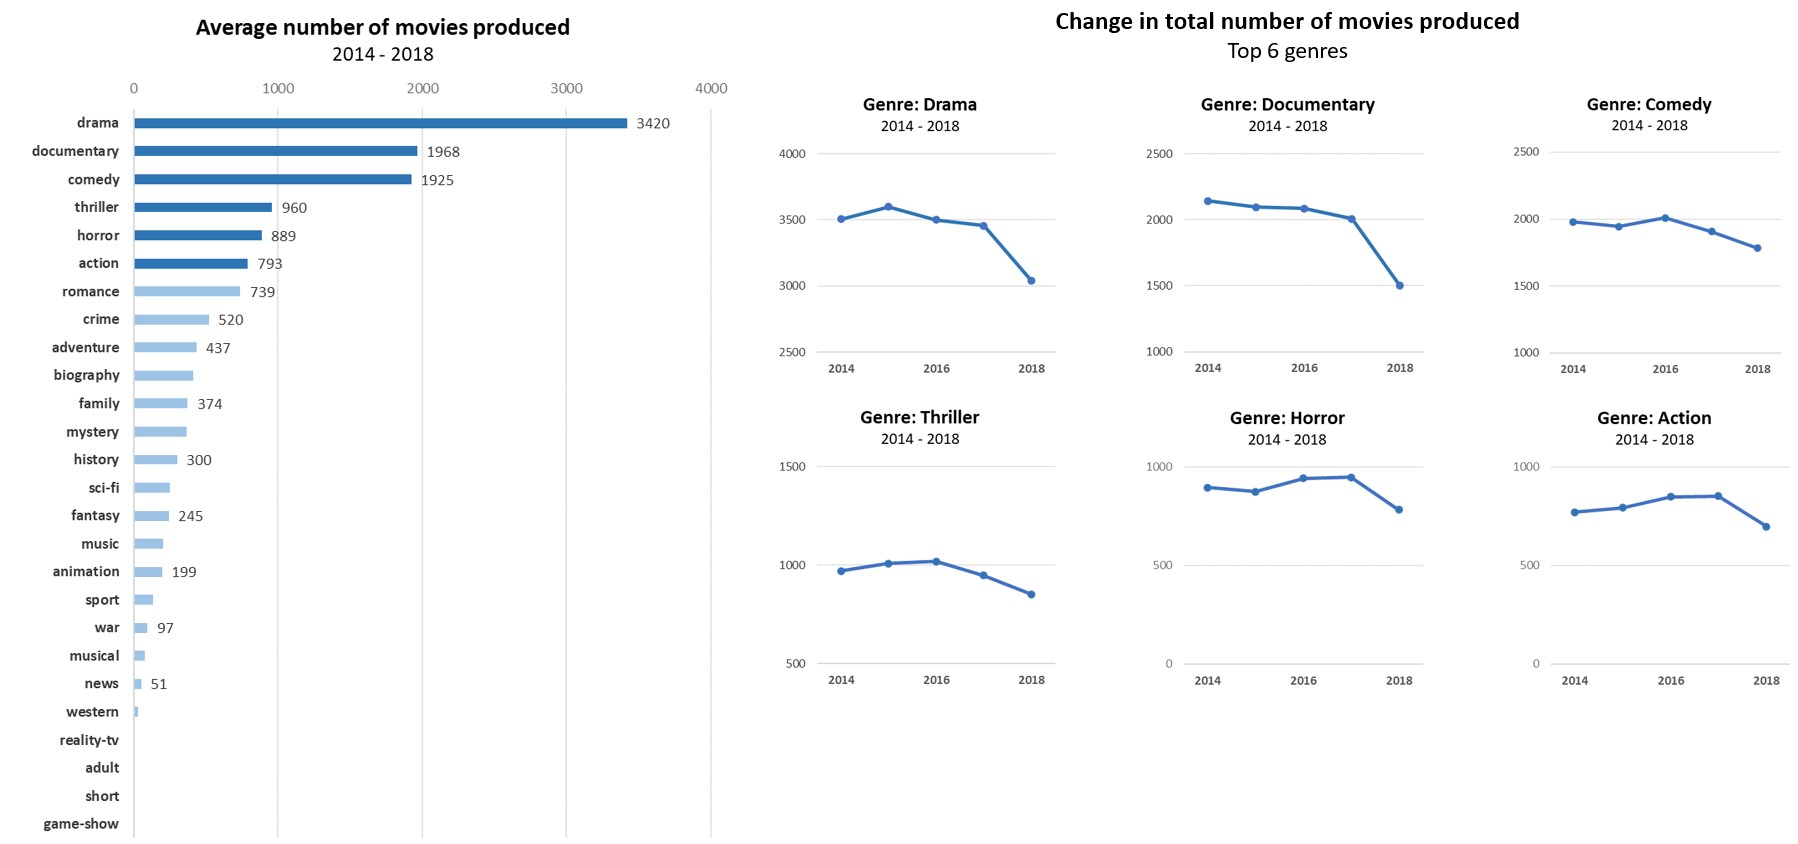

The six most produced film genres between the years 2014 - 2018 were (in descending order): 
1. Drama
2. Documentary
3. Comedy
4. Thriller
5. Horror
6. Action

Amongst this Top 6, **drama** films were the most frequently produced genre, sitting at an average of 3420 movies annually. This amount is almost double the number of films produced within the second- and third-highest genres (documentary and comedy, respectively).

In contrast, a negligible number of films (<100) were produced within the following genres:
1. Sport
2. War
3. Musical
4. News
5. Western
6. Reality-TV
7. Adult
8. Short
9. Game show

> Note: Due to their low numbers, these nine genres will be **excluded from all subsequent analyses.**

Based on the trend analysis for the Top 6 genres, the number of films produced across the years appear to be relatively consistent. However, there is a **noticeable drop** in 2018 - this could be accounted for by the __[financial crisis](https://edition.cnn.com/2018/12/31/investing/dow-stock-market-today/index.html#:~:text=2018%20was%20a%20record%2Dsetting,fell%20in%20the%20past%20decade.)__ experienced that year.


___

## Engagement

<br>

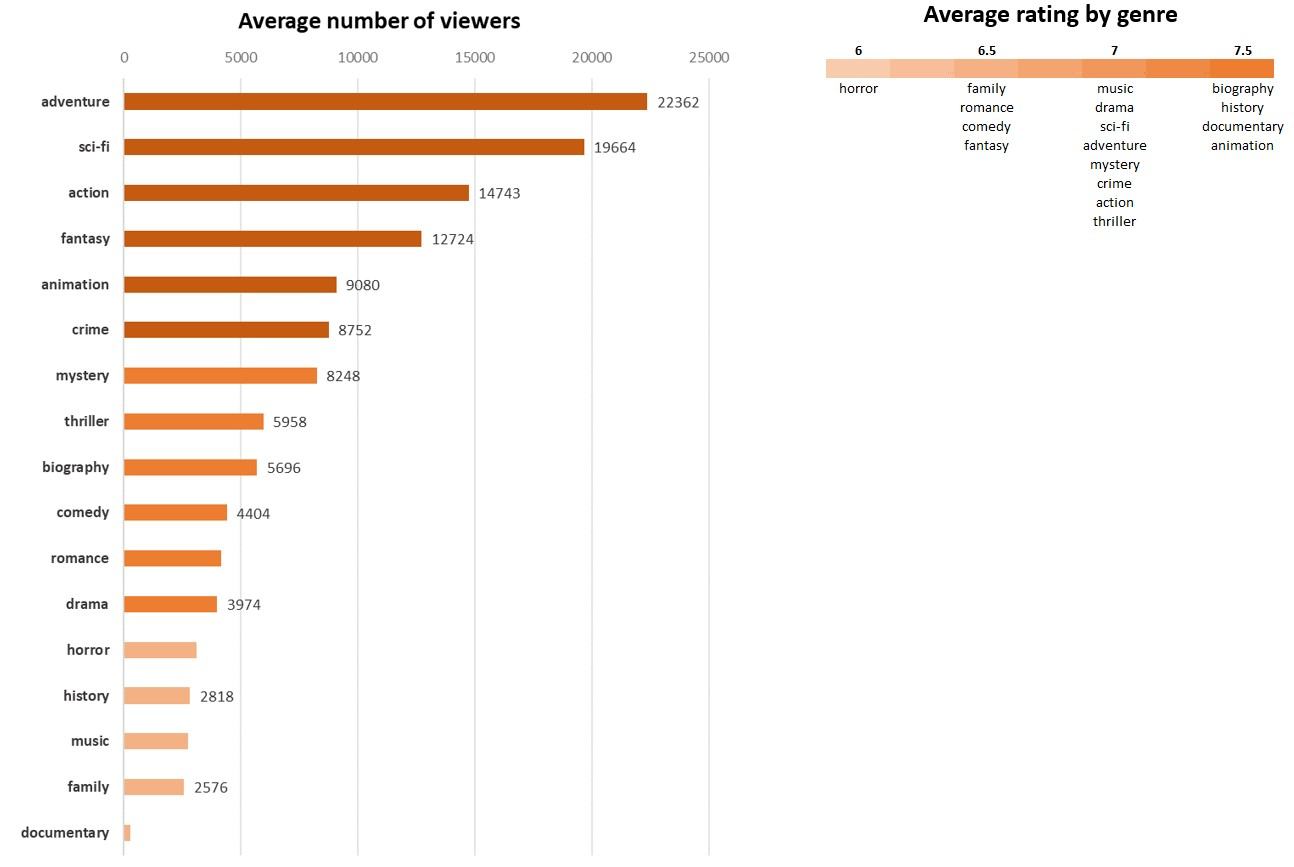

On average, adventure, sci-fi, action, fantasy, animation and crime films enjoy strong levels of viewership, with **adventure** topping this list of genres. 

On the other hand, horror, history, music, family and documentary films tend to have the lowest average number of viewers. This result is particularly interesting for **documentaries**, which was previously seen to be the 2nd most produced genre. It could be that people *are* watching these movies, but they just aren't logging their votes on IMDb (i.e., since viewership was quantified by the number of IMDb votes). 

The range of average ratings (out of ten) across the 17 genres analysed is fairly narrow at 6 - 7.5. Horror films tend to be the lowest rated, while **biographies, history films, documentaries and animation films were the highest rated**. 

___

## Profit

<br>

> Note: Stratification by budget category limited the number of movie records per genre, with some genres having too few records for proper analysis. <br> For each budget category, genres with a number of record <=the 25th percentile were **removed to avoid skewing results.**

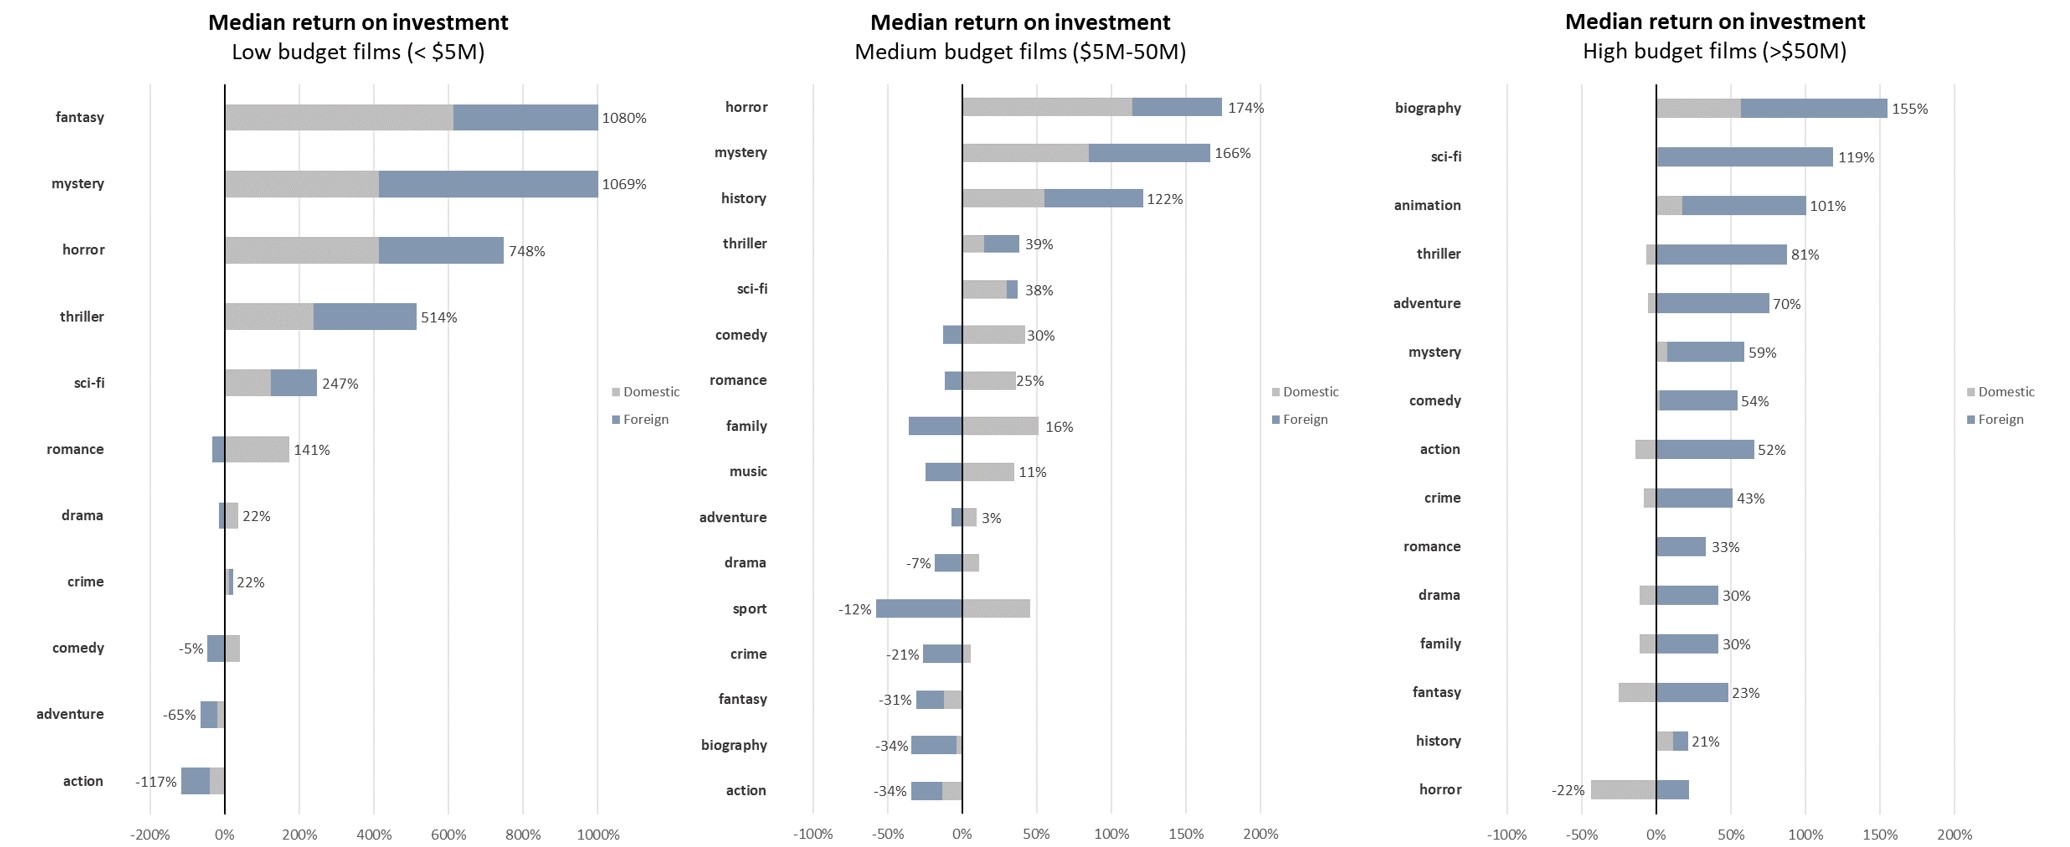

Total number of genres assessed per budget category: 
- Low budget: 11
- Medium budget: 16
- High budget: 15

Based on the insights into overall viewer engagement alone, action, adventure and crime movies may be good to pursue making, given both high viewership and high ratings. However for all three of these genres, the **median return on investment (ROI) appears poor - with numbers even running into the negative -** at least within the context of low and medium budget film categories (Although even within the high budget category, adventure was the only genre from this list that made the Top 5).

Horror films feature a strong ROI within the low and medium budget categories, though viewer engagement within this genre was previously seen to be poor. The fantasy and biography genres, while having good overall viewer engagement, appear to fall short in the profit sector for medium budget films. 

The genres that *do* appear to strike a balance between good engagement and high profit (across all budget categories) are **sci-fi, thriller, mystery, and animation.** No data on animated films were available for the low and medium budget categories, which is understandable given the __[high financial demands associated with producing high-quality animations](https://mowe.studio/how-much-does-animation-cost-vs-live-action/)__.


___

# Conclusions

Three business recommendations based on the above findings: 
1. **Start narrow**. Focus on a narrow range of the following high-performing basic genres: sci-fi, thriller, and mystery. Staying relatively consistent with the film genres produced is also a good way for a movie studio to build a reputation, both within the industry and amongst viewers (e.g., __[A24](https://movieweb.com/a24-pioneer-in-modern-horror/#:~:text=In%20addition%20to%20these%20Aster,been%20pioneering%20in%20modern%20horror.)__.).

2. **Start small**. In terms of production budgets, not ideas. Independent (i.e., indie) films frequenty require smaller budgets. __[Having a small budget doesn't restrict a movie from being a box-office hit.](https://collider.com/movies-with-smallest-budgets/)__.

3. **Start local**. There are __[a lot of factors](https://www.superbusinessmanager.com/how-is-international-marketing-different-from-domestic-marketing/)__ to consider when marketing a movie internationally vs. domestically, with finances being just one of them. The three identified genres appear to perform as well in the domestic market as they do in the international market. 

Animation could be an additional genre to focus on once Microsoft's film studio becomes more established. And of course, shifting to higher production budgets and expanding into foreign markets.

___

## Next steps

It's worth considering the following questions on aspects beyond film genres: 
1. **Marketing strategies**: What are the demographics of avid movie-goers (e.g., age, gender)? Which forms of marketing may work best for these target demographics? 

2. **Talent**: Who's in demand within the industry, in the context of both those in front of and behind (e.g., screenwriters, sound designers) the camera? Who are the up and coming talent? 

3. **Competition**: It's to be expected that movie studios will release certain films during peak periods (e.g., action movies in summer, horror movies in October). How would a smaller studio fare if it released a movie around the same time as - and of a similar genre to - a much larger studio? Would the smaller studio run the risk of being overshadowed? 
